In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from tensorflow import keras

In [3]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
train_df.shape

(42000, 785)

In [8]:
def split_dataset(train_df, test_ratio=0.2):
    test_indices = np.random.rand(len(train_df)) < test_ratio
    return train_df[~test_indices], train_df[test_indices]

train_ds, valid_ds = split_dataset(train_df)

In [9]:
train_ds_new = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds, label='label')
valid_ds_new = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds, label='label')

In [10]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [11]:
rf = tfdf.keras.RandomForestModel()

Use /tmp/tmp0uqkty_4 as temporary training directory


In [12]:
rf.fit(train_ds_new)

Reading training dataset...
Training dataset read in 0:00:37.900971. Found 33586 examples.
Training model...


[INFO 24-01-14 16:43:43.3026 UTC kernel.cc:1243] Loading model from path /tmp/tmp0uqkty_4/model/ with prefix ed42a4b25560450f
[INFO 24-01-14 16:43:50.9056 UTC decision_forest.cc:660] Model loaded with 300 root(s), 902840 node(s), and 551 input feature(s).
[INFO 24-01-14 16:43:50.9057 UTC abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 24-01-14 16:43:50.9061 UTC kernel.cc:1075] Use fast generic engine


Model trained in 0:02:21.766197
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [13]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

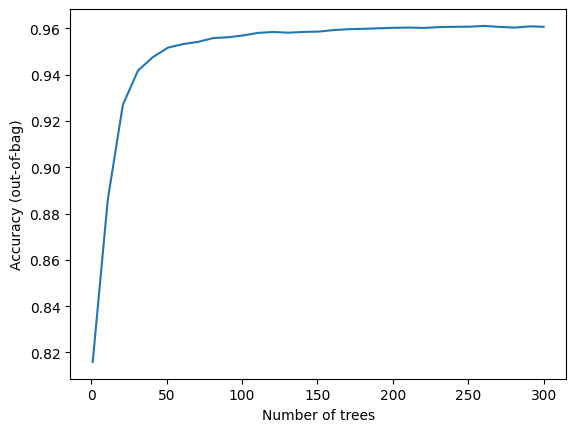

In [14]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [15]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=33586, accuracy=0.9606681355326624, loss=0.2618196844337653, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [16]:
evaluation = rf.evaluate(x=valid_ds_new, return_dict=True)
for name, value in evaluation.items():
    print(f'{name}: {value:.4f}')

9/9 [==============================] - 6s 525ms/step - loss: 0.0000e+00
loss: 0.0000


In [17]:
for importance in inspector.variable_importances().keys():
    print(importance)

NUM_AS_ROOT
NUM_NODES
INV_MEAN_MIN_DEPTH
SUM_SCORE


In [18]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

In [19]:
predictions = rf.predict(test_ds)

28/28 [==============================] - 18s 613ms/step


In [20]:
subm = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [21]:
subm

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [22]:
submission = subm.ImageId

In [23]:
results = np.argmax(predictions,axis = 1)

In [24]:
results

array([2, 0, 9, ..., 3, 9, 2])

In [25]:
output = pd.DataFrame({'ImageId': submission,
                       'Label': results})


In [26]:
output.to_csv('submission.csv', index=False)